<a href="https://colab.research.google.com/github/anandi-22/Aanu/blob/main/Minor_Pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime
#runtime

time: 2.73 ms (started: 2021-03-29 18:21:58 +00:00)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
datadir = '/content/drive/MyDrive/images'

categories = ['kitten','rabbit','puppy'] # Name the folder with these categories
target = []
images=[]
flat_data = []

for category in categories:
   class_num = categories.index(category)
   path = os.path.join(datadir,category)
   for img in os.listdir(path):
     img_array= imread(os.path.join(path,img))
     img_resized= resize(img_array,(150,150,3))
     flat_data.append(img_resized.flatten())
     images.append(img_resized)
     target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 23.6 s (started: 2021-03-29 18:22:37 +00:00)


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.3,random_state=109,stratify=target)

time: 181 ms (started: 2021-03-29 18:23:19 +00:00)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid={
             'kernel':['linear','rbf','poly'],
              'C':[0.1,1,10,100]
                                   
}
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 50s (started: 2021-03-29 18:25:59 +00:00)


In [9]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

time: 770 ms (started: 2021-03-29 18:29:36 +00:00)


In [10]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

time: 1.28 ms (started: 2021-03-29 18:29:42 +00:00)


In [11]:
accuracy_score(y_pred,y_test)

0.4074074074074074

time: 7.49 ms (started: 2021-03-29 18:29:46 +00:00)


In [12]:
confusion_matrix(y_test,y_pred)

array([[2, 3, 4],
       [3, 5, 1],
       [3, 2, 4]])

time: 8.91 ms (started: 2021-03-29 18:30:01 +00:00)


In [13]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.22      0.25      0.24         8
           1       0.56      0.50      0.53        10
           2       0.44      0.44      0.44         9

    accuracy                           0.41        27
   macro avg       0.41      0.40      0.40        27
weighted avg       0.42      0.41      0.41        27

time: 8.06 ms (started: 2021-03-29 18:30:13 +00:00)


In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 104 ms (started: 2021-03-29 18:30:31 +00:00)


In [15]:
model=pickle.load(open('img_model.p','rb'))

time: 57.7 ms (started: 2021-03-29 18:30:43 +00:00)


enter your URLhttps://www.humanesociety.org/sites/default/files/styles/768x326/public/2019/03/rabbit-475261_0.jpg?h=c855054e&itok=f-GfMm2M.jpg
(326, 768, 3)
PREDICTED OUTPUT:rabbit


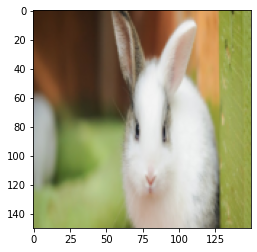

time: 15.3 s (started: 2021-03-29 18:30:57 +00:00)


In [16]:
flat_data = []
url = input ('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data =np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

enter your URLhttps://icatcare.org/app/uploads/2019/09/The-Kitten-Checklist-1.png
(600, 1200, 3)
PREDICTED OUTPUT:kitten


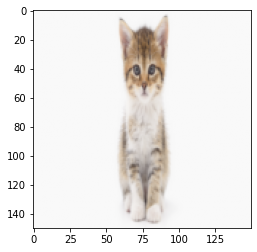

time: 14.7 s (started: 2021-03-29 18:31:32 +00:00)


In [17]:
flat_data = []
url = input ('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data =np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')